In [1]:
import pandas as pd
import numpy as np

In [108]:
data = pd.read_csv("istanbul_ev_ilanlari.csv", index_col=0)

In [109]:
data.head()

,info_,location,home prices,room count,m2,age,floor type
0,Satılık Daire,adalar,6.200.000,3 + 1,130,26,2. Kat
1,Satılık Yazlık,adalar,8.750.000,4 + 1,320,16,Çatı Katı
2,Satılık Müstakil Ev,adalar,14.000.000,7 + 3,400,23,NaN
3,Satılık Daire,adalar,6.500.000,4 + 1,220,50,1. Kat
4,Satılık Daire,adalar,7.500.000,3 + 1,140,30,Bahçe Katı


In [110]:
data.tail()

,info_,location,home prices,room count,m2,age,floor type
79147,Satılık Dükkan & Mağaza,zeytinburnu,2.100.000,NaN,100,28,NaN
79148,Satılık Apartman Dairesi,zeytinburnu,1.650.000,NaN,85,NaN,NaN
79149,Kiralık Dükkan & Mağaza,zeytinburnu,10.000,NaN,180,NaN,NaN
79150,Kiralık Daire,zeytinburnu,50.000,2 + 1,142,1,8. Kat
79151,Kiralık Daire,zeytinburnu,150.000,3 + 1,230,5,Ara Kat


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79152 entries, 0 to 79151
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   info_        79152 non-null  object
 1   location     79152 non-null  object
 2   home prices  79152 non-null  object
 3   room count   67036 non-null  object
 4   m2           79019 non-null  object
 5   age          73773 non-null  object
 6   floor type   62689 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [112]:
data.isnull().sum()

info_              0
location           0
home prices        0
room count     12116
m2               133
age             5379
floor type     16463
dtype: int64

In [ ]:
# "home prices" ve "m2" degiskenleri uzerinde islemler yapabilmek icin noktalari kaldiriyoruz.
data["home prices"] = pd.DataFrame(data["home prices"].str.replace(".", ""))
data["m2"] = pd.DataFrame(data["m2"].str.replace(".", ""))

In [114]:
data["age"].value_counts()

Sıfır Bina    12812
5              6489
4              4848
30             4444
25             3221
              ...  
123               1
154               1
133               1
94                1
195               1
Name: age, Length: 134, dtype: int64

In [115]:
# "Sıfır Bina" degerini 0 yapiyoruz.
data.loc[data["age"] == "Sıfır Bina", "age"] = 0

In [118]:
data["info_"].unique()

array(['Satılık Daire', 'Satılık Yazlık', 'Satılık Müstakil Ev',
       'Satılık Butik Otel', 'Satılık Köşk', 'Kiralık Daire',
       'Satılık Villa', 'Satılık Yalı', 'Satılık Bina',
       'Satılık Yalı Dairesi', 'Kiralık Genel', 'Satılık Otel',
       'Satılık Muhtelif Arsa', 'Satılık Konut+Ticaret',
       'Kiralık Müstakil Ev', 'Satılık İmarlı - Konut', 'Kiralık Yazlık',
       'Kiralık Dükkan & Mağaza', 'Kiralık Sanal & Hazır Ofis',
       'Kiralık Villa', 'Satılık Sit Alanı', 'Satılık Dükkan & Mağaza',
       'Satılık Turistik Arsa', 'Satılık Pansiyon',
       'Günlük Kiralık Daire', 'Satılık Çiftlik', 'Kiralık Köşk',
       'Kiralık Yalı Dairesi', 'Satılık Apart', 'Satılık Genel',
       'Satılık Motel', 'Satılık İmarlı - Sanayi', 'Satılık Tarla',
       'Kiralık Tarla', 'Satılık Ofis', 'Satılık İmarlı - Ticari',
       'Satılık Depo', 'Kiralık Fabrika', 'Satılık Fabrika',
       'Kiralık Atölye', 'Satılık Özel Kullanım', 'Kiralık Muhtelif Arsa',
       'Satılık Bahçe', 'Kiralık

In [119]:
data_sd = data.loc[(data["info_"] == "Satılık Daire") | (data["info_"] == "Satılık Residence")].reset_index(drop=True)

In [120]:
data_sd.isnull().sum()

info_          0
location       0
home prices    0
room count     0
m2             0
age            3
floor type     5
dtype: int64

In [123]:
# null degerleri siliyoruz.
data_sd = data_sd.dropna().reset_index(drop=True)

In [124]:
# verileri islemek icin int tip degisikligi yapiyoruz.
data_sd["home prices"] = data_sd[["home prices"]].astype("int64")
data_sd["m2"] = data_sd[["m2"]].astype("int64")
data_sd["age"] = data_sd[["age"]].astype("int64")

In [125]:
data_sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50660 entries, 0 to 50659
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   info_        50660 non-null  object
 1   location     50660 non-null  object
 2   home prices  50660 non-null  int64 
 3   room count   50660 non-null  object
 4   m2           50660 non-null  int64 
 5   age          50660 non-null  int64 
 6   floor type   50660 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


# aykiri degerler

In [126]:
import seaborn as sns

C:\Users\VuralBayrakli\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='home prices'>

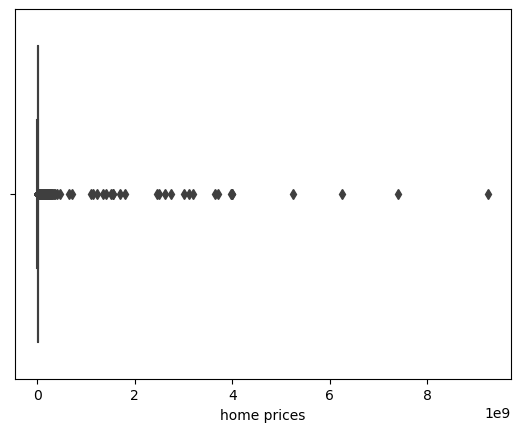

In [127]:
# "home prices" degiskeni aykiri degerler
sns.boxplot(data_sd["home prices"])

C:\Users\VuralBayrakli\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='m2'>

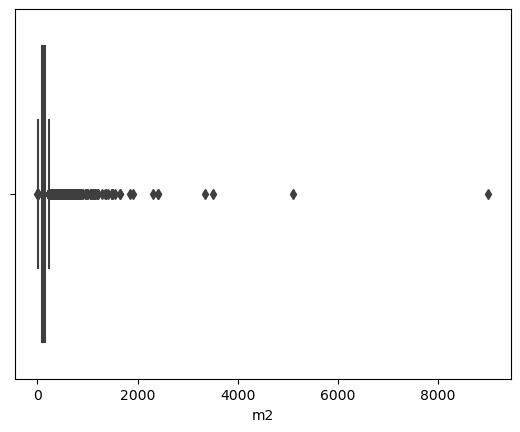

In [128]:
# "m2" degiskeni aykiri degerler
sns.boxplot(data_sd["m2"])

C:\Users\VuralBayrakli\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='age'>

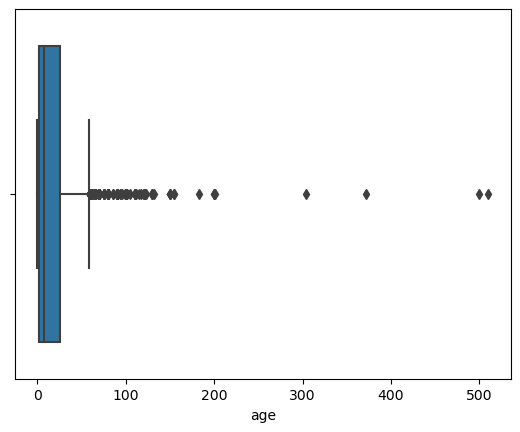

In [129]:
# "age" degiskeni aykiri degerler
sns.boxplot(data_sd["age"])

## bu aykiri degerleri cikariyoruz.

In [130]:
def aykiri_deger(data, var):
    Q1 = np.quantile(data[var], 0.25)
    Q3 = np.quantile(data[var], 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    return data[(data[var] > lower) & (data[var] < upper)].reset_index(drop=True)
    

In [131]:
# "home prices" degiskeni aykiri degerleri cikariyoruz.
data_sd_fixed = aykiri_deger(data_sd, "home prices")

In [132]:
data_sd_fixed

,info_,location,home prices,room count,m2,age,floor type
0,Satılık Daire,adalar,6200000,3 + 1,130,26,2. Kat
1,Satılık Daire,adalar,6500000,4 + 1,220,50,1. Kat
2,Satılık Daire,adalar,7500000,3 + 1,140,30,Bahçe Katı
3,Satılık Daire,adalar,7980000,5 + 1,160,31,Bahçe Katı
4,Satılık Daire,adalar,6250000,4 + 1,170,20,En Üst Kat
...,...,...,...,...,...,...,...
45889,Satılık Daire,zeytinburnu,7500000,3 + 1,130,30,8. Kat
45890,Satılık Daire,zeytinburnu,3000000,3 + 2,160,15,3. Kat
45891,Satılık Daire,zeytinburnu,2600000,3 + 1,130,28,12. Kat
45892,Satılık Daire,zeytinburnu,2100000,2 + 1,100,25,2. Kat


In [133]:
# "m2" degiskeni aykiri degerleri cikariyoruz.
data_sd_fixed = aykiri_deger(data_sd_fixed, "m2")

In [134]:
# "age" degiskeni aykiri degerleri cikariyoruz.
data_sd_fixed = aykiri_deger(data_sd_fixed, "age")

## aykiri degerlerden sonra

C:\Users\VuralBayrakli\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='home prices'>

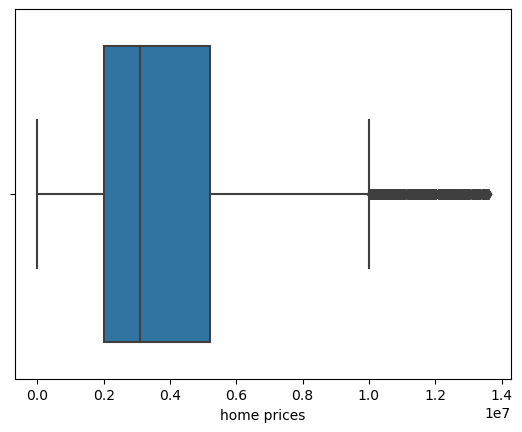

In [135]:
sns.boxplot(data_sd_fixed["home prices"])

C:\Users\VuralBayrakli\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='m2'>

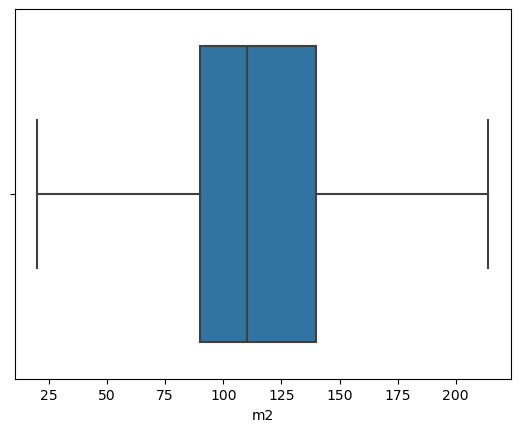

In [136]:
sns.boxplot(data_sd_fixed["m2"])

C:\Users\VuralBayrakli\anaconda3\envs\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='age'>

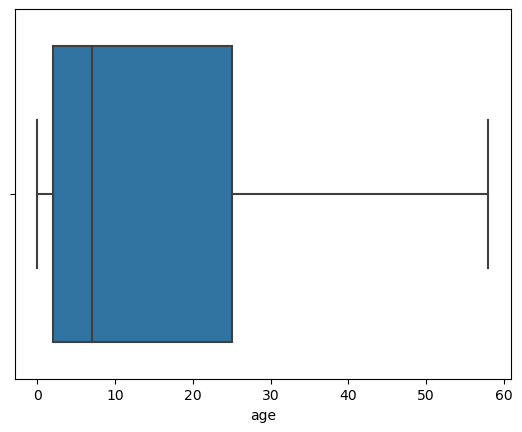

In [137]:
sns.boxplot(data_sd_fixed["age"])

In [138]:
data_sd_fixed["location"].unique()

array(['adalar', 'arnavutkoy', 'atasehir', 'avcilar', 'bagcilar',
       'bahcelievler', 'bakirkoy', 'basaksehir', 'bayrampasa', 'besiktas',
       'beykoz', 'beylikduzu', 'beyoglu', 'buyukcekmece', 'catalca',
       'cekmekoy', 'esenler', 'esenyurt', 'eyupsultan', 'fatih',
       'gaziosmanpasa', 'gungoren', 'kadikoy', 'kagithane', 'kartal',
       'kucukcekmece', 'maltepe', 'pendik', 'sancaktepe', 'sariyer',
       'sile', 'silivri', 'sisli', 'sultanbeyli', 'sultangazi', 'tuzla',
       'umraniye', 'uskudar', 'zeytinburnu'], dtype=object)

In [139]:
data_sd_fixed["age"].unique()

array([26, 30, 31, 20, 40, 35, 33, 36, 28, 49, 44, 41, 32, 25, 38, 24, 52,
        2, 51, 57, 15, 27, 34,  1, 37, 50, 47, 16, 10, 43, 17, 21, 45, 42,
       55, 22, 29,  0,  5,  3,  6,  8,  4,  7, 11,  9, 12, 14, 13, 18, 23,
       48, 19, 46, 39, 53, 54, 56, 58], dtype=int64)

In [140]:
data_sd_fixed["age"].mean()

12.75193585965874

In [141]:
data_sd_fixed["age"].value_counts()

0     8898
5     4114
4     3300
30    2194
3     1642
10    1525
25    1507
35    1499
31    1310
11    1232
1     1222
2     1181
7     1131
8     1128
26    1101
6     1077
40    1031
21     851
15     807
20     733
16     621
12     606
28     495
9      467
13     416
45     352
23     302
27     293
22     287
50     253
29     244
14     236
32     226
24     212
18     208
33     170
17     170
38     169
19     100
36      96
34      90
37      49
39      41
55      34
42      32
48      21
43      18
44      15
47      14
41      14
52      12
49      10
46       9
51       4
57       2
53       2
54       2
56       2
58       2
Name: age, dtype: int64

C:\Users\VuralBayrakli\AppData\Local\Temp\ipykernel_21672\2154840668.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ax.pie(data_sd_fixed["age"].value_counts()[:20], labels=data_sd_fixed['age'].value_counts().index[:20],autopct='%1.1f%%',shadow=True,radius=2,startangle=90)


Text(0.5, 1.0, 'Building Age')

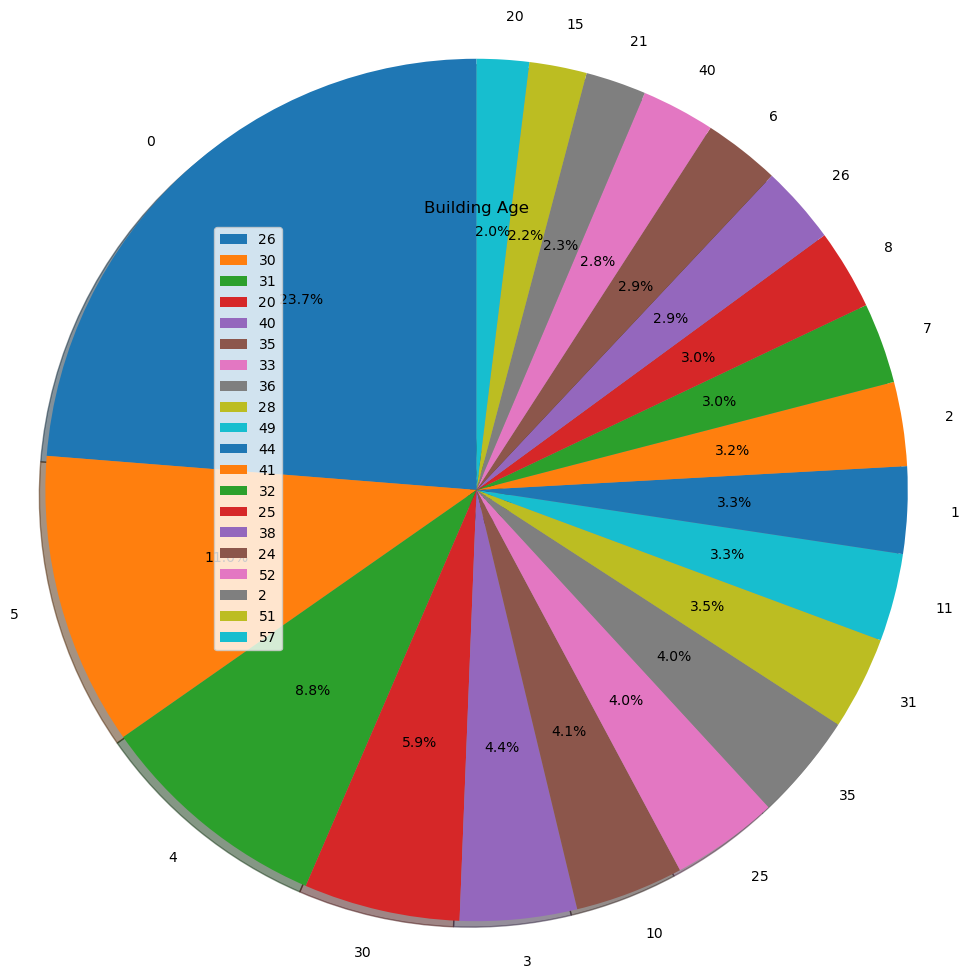

In [142]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 7))
ax = plt.gca()

ax.pie(data_sd_fixed["age"].value_counts()[:20], labels=data_sd_fixed['age'].value_counts().index[:20],autopct='%1.1f%%',shadow=True,radius=2,startangle=90)
ax.legend(data_sd_fixed["age"].unique())
ax.set_title("Building Age")

In [143]:
data_sd_fixed[data_sd_fixed["age"]==0]["home prices"].mean()

3953565.0105641717

In [144]:
data_sd_fixed[data_sd_fixed["age"]==0]["home prices"].max()

13550000

In [145]:
data_sd_fixed[data_sd_fixed["age"]==0]["location"].value_counts()

beylikduzu       1267
kadikoy           891
maltepe           840
esenyurt          791
kucukcekmece      460
bahcelievler      416
sancaktepe        355
kagithane         330
uskudar           324
cekmekoy          301
kartal            254
avcilar           251
eyupsultan        245
buyukcekmece      230
basaksehir        181
sultanbeyli       167
sultangazi        151
umraniye          137
bakirkoy          133
gaziosmanpasa     115
zeytinburnu       110
silivri            97
sisli              97
arnavutkoy         97
pendik             93
besiktas           90
tuzla              77
bayrampasa         70
sariyer            58
beyoglu            52
bagcilar           52
fatih              42
esenler            39
atasehir           34
gungoren           26
sile               22
beykoz              3
Name: location, dtype: int64

In [151]:
data_sd_fixed["room count"].value_counts()

2 + 1     19408
3 + 1     15468
1 + 1      4764
4 + 1      1765
3 + 2       751
4 + 2       725
2 + 2       198
5 + 1       168
5 + 2       102
6 + 1        25
3 + 3        18
6 + 2        13
1 + 2         9
3 + 0         6
4 + 4         5
2 + 0         5
1 + 3         4
4 + 0         3
4 + 3         2
7 + 1         2
2 + 4         2
4 + 5         1
2 + 10        1
1 + 5         1
5 + 4         1
3 + 4         1
2 + 3         1
3 + 12        1
3 + 5         1
11 + 1        1
Name: room count, dtype: int64

In [76]:
data_sd_fixed = data_sd_fixed[data_sd_fixed["room count"] != "Stüdyo"].reset_index(drop=True)

In [149]:
# aykiri degerleri cikariyoruz.
data_sd_fixed = data_sd_fixed[ (data_sd_fixed["room count"] != "Stüdyo")
              & (data_sd_fixed["room count"] != "2 + 100")
              & (data_sd_fixed["room count"] != "135 + 115") 
              & (data_sd_fixed["room count"] != "31 + 1") 
              & (data_sd_fixed["room count"] != "30 + 1") 
              & (data_sd_fixed["room count"] != "41 + 1") 
              & (data_sd_fixed["room count"] != "3 + 145") 
              & (data_sd_fixed["room count"] != "21 + 1") 
              & (data_sd_fixed["room count"] != "2 + 11") 
              & (data_sd_fixed["room count"] != "3 + 11") 
              & (data_sd_fixed["room count"] != "2 + 13") 
              & (data_sd_fixed["room count"] != "25 + 1")].reset_index(drop=True)

In [152]:
data_sd_fixed.to_csv("istanbul_ev_ilanlari(manipüle_edilmis).csv")